In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold, StratifiedShuffleSplit, train_test_split
from sklearn.metrics import balanced_accuracy_score, f1_score, precision_score, recall_score, classification_report
import sys
import pandas as pd
import shap

name = "shadow"
with open("features/features_" + name + ".csv", "r") as f:
  line = f.readline()
  feature_names = line.split(",")
  feature_names.pop(0)

data = pd.read_csv("features/features_" + name + ".csv")
labels = pd.read_csv("labels/labels_" + name + ".csv",header=None, names=['name', 'label'])
data = data.merge(labels, on='name')
names = data.loc[:,"name"]
y = data.loc[:,"label"]
X = data.drop(["name","label"], axis = 1)

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=0)
for train_index, test_index in sss.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [2]:
param_grid =  {"criterion": ["gini","entropy"],"min_samples_leaf":[2,3,4,5,6,7,8,9,10,11,12],"max_depth":[1,2,3,4,5,6,7,8,9,10,11,12]}
dt = DecisionTreeClassifier(random_state=0)
cv = StratifiedKFold(n_splits=10)
search = GridSearchCV(estimator=dt, param_grid=param_grid, cv = cv, scoring = "balanced_accuracy", n_jobs = -1)
search.fit(X_train, y_train)

print(
    "The best parameters are %s with a score of %0.5f in training and a score of %0.5f in testing"
    % (search.best_params_, search.best_score_,search.best_estimator_.score(X_test,y_test))
)
model1 = search.best_estimator_
y_pred = model1.predict(X_test)
print(
    "The F1-score is %0.5f"
    % (f1_score(y_test,y_pred))
)
print(
    "The balance accuracy is %0.5f"
    % (balanced_accuracy_score(y_test,y_pred))
)
print(
    "The precision is %0.5f"
    % (precision_score(y_test,y_pred))
)
print(
    "The recall is %0.5f"
    % (recall_score(y_test,y_pred))
)
print(classification_report(y_test,y_pred))

The best parameters are {'criterion': 'entropy', 'max_depth': 12, 'min_samples_leaf': 4} with a score of 0.88331 in training and a score of 0.92941 in testing
The F1-score is 0.95504
The balance accuracy is 0.90192
The precision is 0.96080
The recall is 0.94935
              precision    recall  f1-score   support

       False       0.82      0.85      0.84       268
        True       0.96      0.95      0.96      1007

    accuracy                           0.93      1275
   macro avg       0.89      0.90      0.90      1275
weighted avg       0.93      0.93      0.93      1275



In [3]:
for i in range(len(y_pred)):
    if y_pred[i] != y_test.iloc[i]:
        print(y_test.iloc[i])
        print(names[test_index[i]])

False
a08ca509a6a895854156888cee1e97c3
True
a00c2fa51d4abf1929cb4fa0b9e787a2
True
a055ccbceafb9f0c7e67f9a149bed524
False
a099f6a976bb7413213af7464d12a1fe
True
a00af9f4154ac4d5bcaca369b3b4d3d8
False
a0145d420490cb50ad02d06956cf1910
False
a008de926830c9ed91ad383e4d6392de
True
a05f30fe7d4fa38fefbabbc724d839a1
True
a001ff1aef4c96816be9435a3b015961
True
a00294f70e6d8d47666045bcab7c3985
False
a082b34ee15529ac51cec7e5a9d04b64
True
a00ed134fdbdc118f1b44989456efec7
True
a05c1fd05cff30791ebaee79747dd8d1
True
a04617dbbbef694bfbf19b904be28487
False
a09d5500ddab1f918a8cb0909998578b
True
a020506f70c50fbc0943e3149d71549e
False
a007dabf0406dfab6ff5e9871aaae600
True
a07f658fc57c8df0bb982f3d199d1716
False
a03de1102f4536d57ead3159dcb03c60
False
a078328474f3b8bd79e05d090d1f49c5
False
a0a88433713ee33228f97d80a1b18ed7
True
a0300687003fae74af36e450fbd46540
True
a04291a81358e32d59e4e7a425bcc87b
False
a0b82625deca8f84fb65aae5d2273c0c
False
a0a08dfefff3adb3c90e11946f735783
True
a0068f73ced3bdc34c81343b0ac9b384


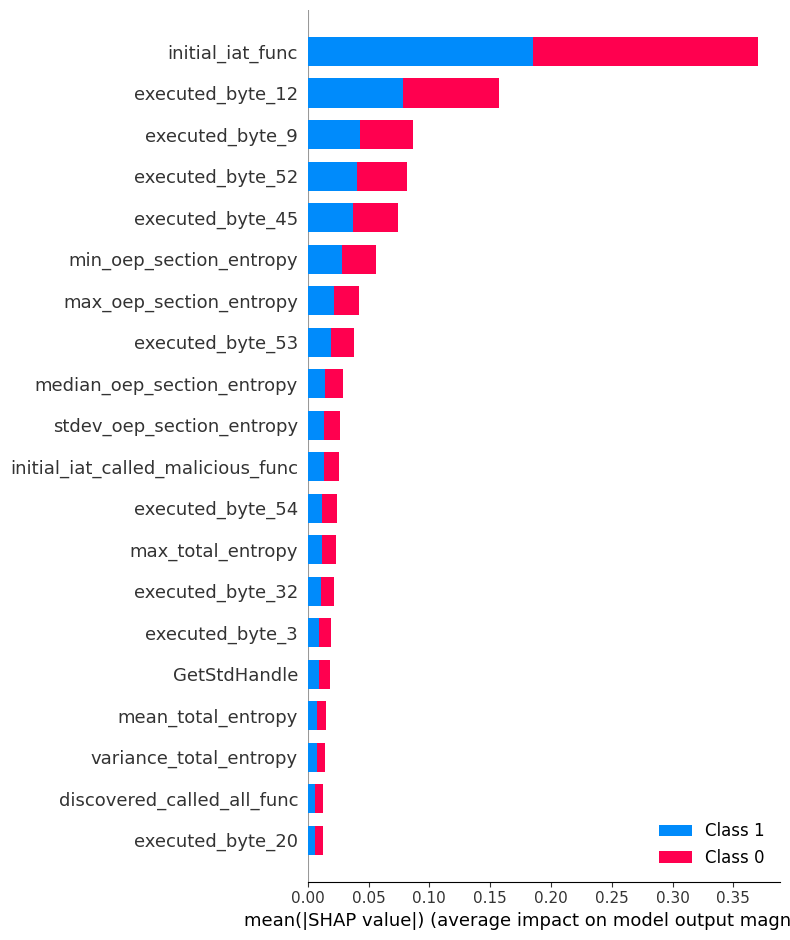

In [4]:
explainer = shap.Explainer(model1)
shap_obj = explainer(X_train)
shap_values = explainer.shap_values(X_train)

shap.summary_plot(shap_values, features = X_train,feature_names=feature_names,show=False)
plt.savefig("figures/fig1.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [5]:
param_grid =  {"criterion": ["gini","entropy"],"min_samples_leaf":[2,3,4,5,6,7,8,9,10,11,12],"max_depth":[1,2,3,4,5,6,7,8,9,10,11,12],"n_estimators" : [i for i in range(10,40)]}
rf = RandomForestClassifier(random_state = 0)
cv = StratifiedKFold(n_splits=10)
search = GridSearchCV(estimator=rf, param_grid=param_grid, cv = cv, scoring = "balanced_accuracy", n_jobs = -1)
search.fit(X_train, y_train)
print(
    "The best parameters are %s with a score of %0.5f in training and a score of %0.5f in testing"
    % (search.best_params_, search.best_score_,search.best_estimator_.score(X_test,y_test))
)
model2 = search.best_estimator_
y_pred = model2.predict(X_test)
print(
    "The F1-score is %0.5f"
    % (f1_score(y_test,y_pred))
)
print(
    "The balance accuracy is %0.5f"
    % (balanced_accuracy_score(y_test,y_pred))
)
print(
    "The precision is %0.5f"
    % (precision_score(y_test,y_pred))
)
print(
    "The recall is %0.5f"
    % (recall_score(y_test,y_pred))
)
print(classification_report(y_test,y_pred))

The best parameters are {'criterion': 'entropy', 'max_depth': 12, 'min_samples_leaf': 2, 'n_estimators': 17} with a score of 0.90507 in training and a score of 0.93882 in testing
The F1-score is 0.96158
The balance accuracy is 0.89692
The precision is 0.95406
The recall is 0.96922
              precision    recall  f1-score   support

       False       0.88      0.82      0.85       268
        True       0.95      0.97      0.96      1007

    accuracy                           0.94      1275
   macro avg       0.92      0.90      0.91      1275
weighted avg       0.94      0.94      0.94      1275



In [6]:
for i in range(len(y_pred)):
    if y_pred[i] != y_test.iloc[i]:
        print(y_test.iloc[i])
        print(names[test_index[i]])

True
a01f6fe0ad17762e98bc75711a1dbded
False
a08ca509a6a895854156888cee1e97c3
True
a00c2fa51d4abf1929cb4fa0b9e787a2
False
a099f6a976bb7413213af7464d12a1fe
False
a0145d420490cb50ad02d06956cf1910
False
a0693f245f45395922242a733ee517f0
False
a0402ae0a11d08f359380c43bc44df64
True
a0248da5c839f959b83fcb0fbcefdbfe
True
a05f30fe7d4fa38fefbabbc724d839a1
False
a04407fda40c9a311c727bd25528b8f0
False
a01b493cb0679659a1aa67b1ff2878bb
False
a082b34ee15529ac51cec7e5a9d04b64
True
a00ed134fdbdc118f1b44989456efec7
True
a04617dbbbef694bfbf19b904be28487
True
a0312212cfb1ea2af8f73f1e0ce63817
True
a07f658fc57c8df0bb982f3d199d1716
False
a078328474f3b8bd79e05d090d1f49c5
False
a0659b007433564def73eb8d5b56f0ed
False
a0a88433713ee33228f97d80a1b18ed7
True
a04291a81358e32d59e4e7a425bcc87b
False
a0a08dfefff3adb3c90e11946f735783
True
a00abcfdcc0f5fa6836f51a0637e1fe7
False
a0b9372a8bf6fdf9a8db6e0b656a364c
True
a02eae1af424181bf30437157a22e983
True
a043d1c549dd6c0d77813e4a26dff14d
False
a00866d2cd0edd307f67738bf191e8e

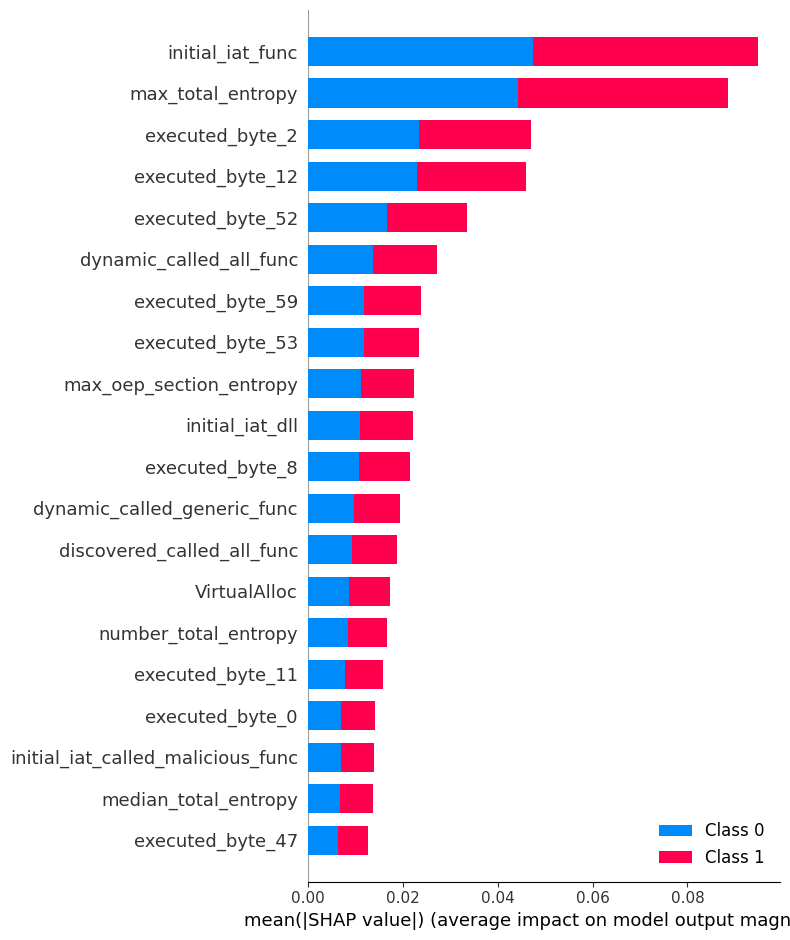

In [7]:
explainer = shap.Explainer(model2)
shap_obj = explainer(X_train)
shap_values = explainer.shap_values(X_train)

shap.summary_plot(shap_values, features = X_train,feature_names=feature_names,show=False)
plt.savefig("figures/fig2.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [8]:
param_grid = {"criterion":["friedman_mse","squared_error"],"loss": ["log_loss","exponential"],"min_samples_leaf":[2,3,4,5,6,7,8,9,10,11,12],"max_depth":[1,2,3,4,5,6,7,8,9,10,11,12],"n_estimators" : [i for i in range(10,40)]}
gbdt = GradientBoostingClassifier(random_state = 0)
cv = StratifiedKFold(n_splits=10)
search = GridSearchCV(estimator=gbdt, param_grid=param_grid, cv = cv, scoring = "balanced_accuracy", n_jobs = -1)
search.fit(X_train, y_train)
print(
    "The best parameters are %s with a score of %0.5f in training and a score of %0.5f in testing"
    % (search.best_params_, search.best_score_,search.best_estimator_.score(X_test,y_test))
)
model3 = search.best_estimator_
y_pred = model3.predict(X_test)
print(
    "The F1-score is %0.5f"
    % (f1_score(y_test,y_pred))
)
print(
    "The balance accuracy is %0.5f"
    % (balanced_accuracy_score(y_test,y_pred))
)
print(
    "The precision is %0.5f"
    % (precision_score(y_test,y_pred))
)
print(
    "The recall is %0.5f"
    % (recall_score(y_test,y_pred))
)
print(classification_report(y_test,y_pred))

The best parameters are {'criterion': 'squared_error', 'loss': 'exponential', 'max_depth': 7, 'min_samples_leaf': 12, 'n_estimators': 39} with a score of 0.91016 in training and a score of 0.94510 in testing
The F1-score is 0.96531
The balance accuracy is 0.91458
The precision is 0.96340
The recall is 0.96723
              precision    recall  f1-score   support

       False       0.88      0.86      0.87       268
        True       0.96      0.97      0.97      1007

    accuracy                           0.95      1275
   macro avg       0.92      0.91      0.92      1275
weighted avg       0.94      0.95      0.94      1275



In [9]:
for i in range(len(y_pred)):
    if y_pred[i] != y_test.iloc[i]:
        print(y_test.iloc[i])
        print(names[test_index[i]])

True
a00c7a4f7843a82943a4d0f75f2d27cf
False
a08ca509a6a895854156888cee1e97c3
True
a00c2fa51d4abf1929cb4fa0b9e787a2
True
a055ccbceafb9f0c7e67f9a149bed524
False
a099f6a976bb7413213af7464d12a1fe
True
a05f30fe7d4fa38fefbabbc724d839a1
False
a04407fda40c9a311c727bd25528b8f0
False
a01b493cb0679659a1aa67b1ff2878bb
True
a0bb8d256c773146245da0f87c3560f0
True
a00294f70e6d8d47666045bcab7c3985
False
a082b34ee15529ac51cec7e5a9d04b64
True
a00ed134fdbdc118f1b44989456efec7
True
a05c1fd05cff30791ebaee79747dd8d1
True
a04617dbbbef694bfbf19b904be28487
True
a01dda492c6cd7de33730a7a1d31d634
True
a07f658fc57c8df0bb982f3d199d1716
False
a0a88433713ee33228f97d80a1b18ed7
True
a04291a81358e32d59e4e7a425bcc87b
False
a0a08dfefff3adb3c90e11946f735783
True
a00abcfdcc0f5fa6836f51a0637e1fe7
False
a0b9372a8bf6fdf9a8db6e0b656a364c
True
a02eae1af424181bf30437157a22e983
True
a043d1c549dd6c0d77813e4a26dff14d
False
a02d85758a5933da789c1b3a97553762
False
a0943e3483b9d8a3c38202645b601b60
False
a07369c3a45afb8cc02708fad3ec42e4
F

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


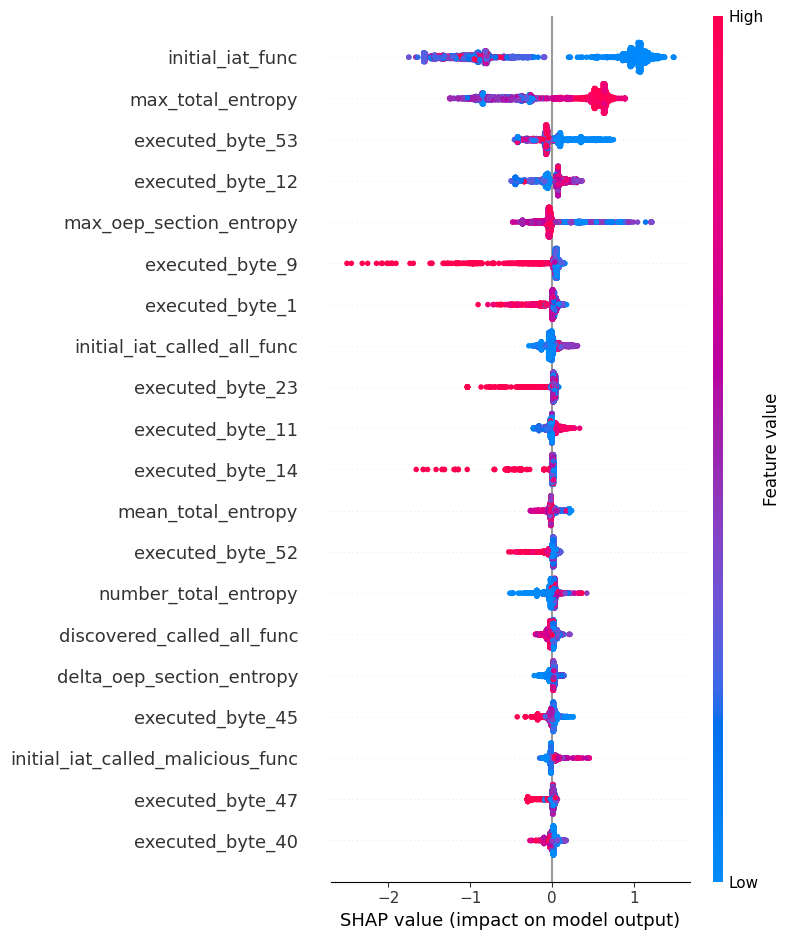

In [10]:
explainer = shap.Explainer(model3)
shap_obj = explainer(X_train)
shap_values = explainer.shap_values(X_train)

shap.summary_plot(shap_values, features = X_train,feature_names=feature_names,show=False)
plt.savefig("figures/fig3.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [11]:
with open("features/static_features_" + name + ".csv", "r") as f:
  line = f.readline()
  feature_names = line.split(",")
  feature_names.pop(0)

data_static = pd.read_csv("features/static_features_" + name + ".csv")
data_static = data_static.merge(labels, on='name')
data_static = data_static.merge(data.loc[:,"name"], on='name')
names = data_static.loc[:,"name"]
y = data_static.loc[:,"label"]
X = data_static.drop(["name", "label"], axis = 1)

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=0)
for train_index, test_index in sss.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [12]:
param_grid =  {"criterion": ["gini","entropy"],"min_samples_leaf":[2,3,4,5,6,7,8,9,10,11,12],"max_depth":[1,2,3,4,5,6,7,8,9,10,11,12]}
dt = DecisionTreeClassifier(random_state=0)
cv = StratifiedKFold(n_splits=10)
search = GridSearchCV(estimator=dt, param_grid=param_grid, cv = cv, scoring = "balanced_accuracy", n_jobs = -1)
search.fit(X_train, y_train)
print(
    "The best parameters are %s with a score of %0.5f in training and a score of %0.5f in testing"
    % (search.best_params_, search.best_score_,search.best_estimator_.score(X_test,y_test))
)
model4 = search.best_estimator_
y_pred = model4.predict(X_test)
print(
    "The F1-score is %0.5f"
    % (f1_score(y_test,y_pred))
)
print(
    "The balance accuracy is %0.5f"
    % (balanced_accuracy_score(y_test,y_pred))
)
print(
    "The precision is %0.5f"
    % (precision_score(y_test,y_pred))
)
print(
    "The recall is %0.5f"
    % (recall_score(y_test,y_pred))
)
print(classification_report(y_test,y_pred))

The best parameters are {'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 8} with a score of 0.90421 in training and a score of 0.94588 in testing
The F1-score is 0.96582
The balance accuracy is 0.91508
The precision is 0.96344
The recall is 0.96822
              precision    recall  f1-score   support

       False       0.88      0.86      0.87       268
        True       0.96      0.97      0.97      1007

    accuracy                           0.95      1275
   macro avg       0.92      0.92      0.92      1275
weighted avg       0.95      0.95      0.95      1275



In [13]:
for i in range(len(y_pred)):
    if y_pred[i] != y_test.iloc[i]:
        print(y_test.iloc[i])
        print(names[test_index[i]])

True
a0afb16d7b851f5930cf874fc1afdbaf
False
a08b5e1b59840058e92c356d6ee08737
False
a098aa803643fc59a3f23d104d695558
False
a017f92b591d09c0f68b83ba8a29f554
True
a03dadb4b7ef102dbe9ef175bf0285ac
True
a07664b6901a96d45a03d4966bfb43d6
True
a07160a12815164ff32a80856b394773
False
a0b4e079b81db62bc2cfeeb22d6451a8
True
a07daf8fb64b0d54c582f740676cc60e
False
a02a2e7426204b282d72a503eca9fc7b
True
a059db30dc0ef2736191cf19b3191b75
True
a0605869ee809c86fb785bc8164a339a
False
a012845102c4f8d7a36fdd968843ede2
False
a0179b1567f3cb174f3ce823188e45b5
True
a074f18d18875b45c6ba5e9c5e7f8976
False
a07c3ac395fa1d1cd0699d5db034d574
False
a03044f52aa37c0631aa7ca1b227ee8b
False
a084c0b66332e8036e11766fa7569dad
True
a04b24f8a94b5344a4694e317e2bb103
False
a0189b4b27eeaedfbe84d61443e4060d
False
a00866d2cd0edd307f67738bf191e8e2
False
a09d4cf367bdd3074f89ac4d2d2675ef
True
a05dc78cae4bdf0fb16e63f9be6c6dae
True
a06f91cdbdf520051d89b61cee200da5
False
a06c6e8cba2ea1b41560d1027d6544fc
False
a064f441db555e4935cc206d663cab

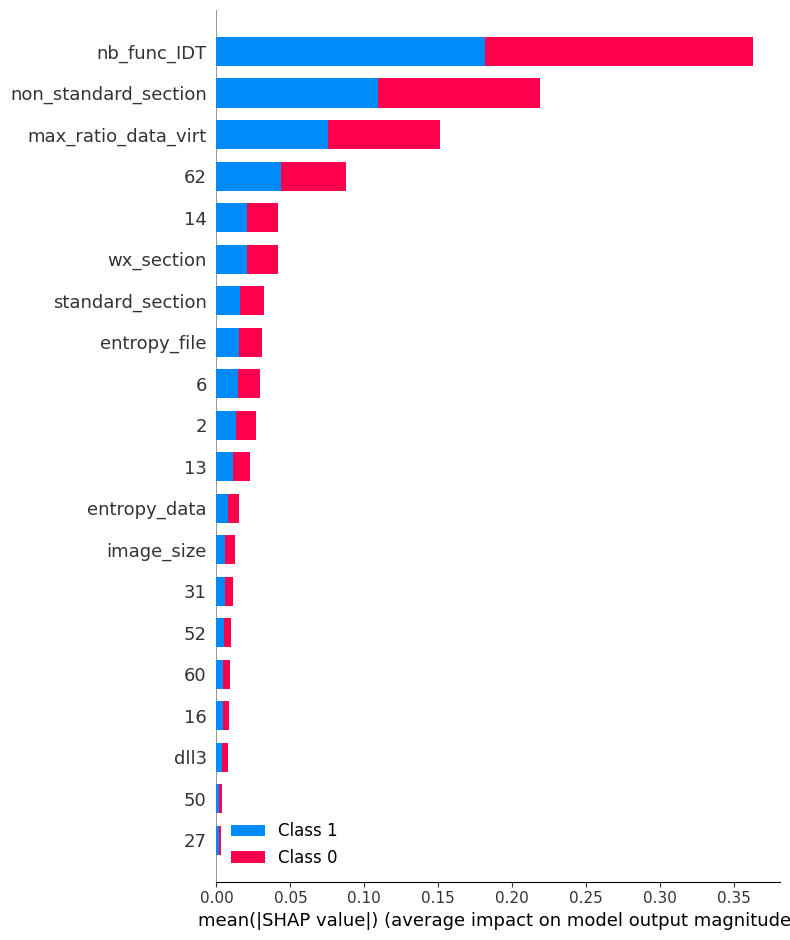

In [14]:
explainer = shap.Explainer(model4)
shap_obj = explainer(X_train)
shap_values = explainer.shap_values(X_train)

shap.summary_plot(shap_values, features = X_train,feature_names=feature_names,show=False)
plt.savefig("figures/fig4.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [15]:
param_grid =  {"criterion": ["gini","entropy"],"min_samples_leaf":[2,3,4,5,6,7,8,9,10,11,12],"max_depth":[1,2,3,4,5,6,7,8,9,10,11,12],"n_estimators" : [i for i in range(10,40)]}
rf = RandomForestClassifier(random_state = 0)
cv = StratifiedKFold(n_splits=10)
search = GridSearchCV(estimator=rf, param_grid=param_grid, cv = cv, scoring = "balanced_accuracy", n_jobs = -1)
search.fit(X_train, y_train)
print(
    "The best parameters are %s with a score of %0.5f in training and a score of %0.5f in testing"
    % (search.best_params_, search.best_score_,search.best_estimator_.score(X_test,y_test))
)
model5 = search.best_estimator_
y_pred = model5.predict(X_test)
print(
    "The F1-score is %0.5f"
    % (f1_score(y_test,y_pred))
)
print(
    "The balance accuracy is %0.5f"
    % (balanced_accuracy_score(y_test,y_pred))
)
print(
    "The precision is %0.5f"
    % (precision_score(y_test,y_pred))
)
print(
    "The recall is %0.5f"
    % (recall_score(y_test,y_pred))
)
print(classification_report(y_test,y_pred))

The best parameters are {'criterion': 'entropy', 'max_depth': 11, 'min_samples_leaf': 2, 'n_estimators': 23} with a score of 0.92091 in training and a score of 0.95765 in testing
The F1-score is 0.97313
The balance accuracy is 0.93896
The precision is 0.97507
The recall is 0.97120
              precision    recall  f1-score   support

       False       0.89      0.91      0.90       268
        True       0.98      0.97      0.97      1007

    accuracy                           0.96      1275
   macro avg       0.93      0.94      0.94      1275
weighted avg       0.96      0.96      0.96      1275



In [16]:
for i in range(len(y_pred)):
    if y_pred[i] != y_test.iloc[i]:
        print(y_test.iloc[i])
        print(names[test_index[i]])

False
a098aa803643fc59a3f23d104d695558
False
a017f92b591d09c0f68b83ba8a29f554
True
a03dadb4b7ef102dbe9ef175bf0285ac
True
a07664b6901a96d45a03d4966bfb43d6
False
a0b4e079b81db62bc2cfeeb22d6451a8
True
a059db30dc0ef2736191cf19b3191b75
False
a08687703406ef147e59b22839cdaa23
True
a0605869ee809c86fb785bc8164a339a
False
a0179b1567f3cb174f3ce823188e45b5
False
a084c0b66332e8036e11766fa7569dad
True
a04b24f8a94b5344a4694e317e2bb103
False
a09d5500ddab1f918a8cb0909998578b
True
a0054bb190270dff4965574e5ef29fa1
True
a03c7ed46b56ae340152c5d542620865
False
a01bf936c1153037dbbdacbbeb109a0e
True
a02537ec351bf66c3b148c5aa71651e3
False
a0b03c1cad01fb2f4336bd9202a1be2f
True
a07fd35a2ec596e41fc1224d06682e84
True
a044a9cca46f2d90d5312eebb1bfe8aa
True
a055ccbceafb9f0c7e67f9a149bed524
True
a06d2eac50542e7a2c7a0783ce4e704b
True
a00243dcacc32f861f30973770019598
False
a093af411830a88b23394db59d0618c7
True
a07339a77e34fe56c4bf713d7d366d81
False
a081e362030faf5422c1d09467883207
False
a0725c4c47ebea74bb3a90f3eee3a3be


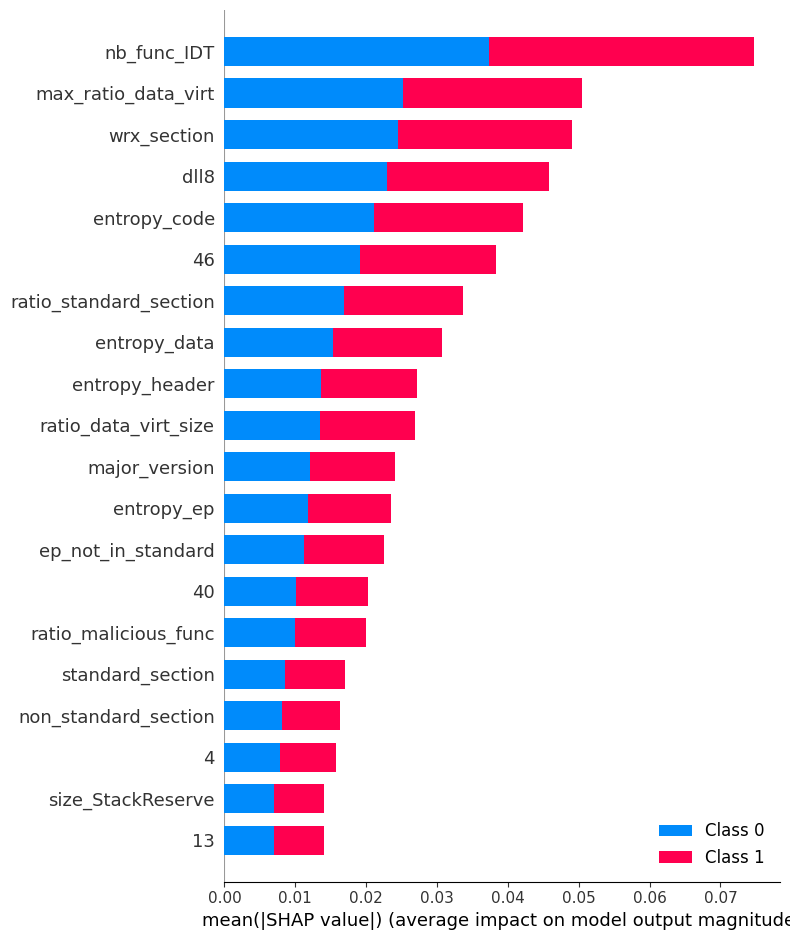

In [17]:
explainer = shap.Explainer(model5)
shap_obj = explainer(X_train)
shap_values = explainer.shap_values(X_train)

shap.summary_plot(shap_values, features = X_train,feature_names=feature_names,show=False)
plt.savefig("figures/fig5.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [18]:
param_grid = {"criterion":["friedman_mse","squared_error"],"loss": ["log_loss","exponential"],"min_samples_leaf":[2,3,4,5,6,7,8,9,10,11,12],"max_depth":[1,2,3,4,5,6,7,8,9,10,11,12],"n_estimators" : [i for i in range(10,40)]}
gbdt = GradientBoostingClassifier(random_state = 0)
cv = StratifiedKFold(n_splits=10)
search = GridSearchCV(estimator=gbdt, param_grid=param_grid, cv = cv, scoring = "balanced_accuracy", n_jobs = -1)
search.fit(X_train, y_train)
print(
    "The best parameters are %s with a score of %0.5f in training and a score of %0.5f in testing"
    % (search.best_params_, search.best_score_,search.best_estimator_.score(X_test,y_test))
)
model6 = search.best_estimator_
y_pred = model6.predict(X_test)
print(
    "The F1-score is %0.5f"
    % (f1_score(y_test,y_pred))
)
print(
    "The balance accuracy is %0.5f"
    % (balanced_accuracy_score(y_test,y_pred))
)
print(
    "The precision is %0.5f"
    % (precision_score(y_test,y_pred))
)
print(
    "The recall is %0.5f"
    % (recall_score(y_test,y_pred))
)
print(classification_report(y_test,y_pred))

The best parameters are {'criterion': 'friedman_mse', 'loss': 'log_loss', 'max_depth': 8, 'min_samples_leaf': 3, 'n_estimators': 39} with a score of 0.92358 in training and a score of 0.95843 in testing
The F1-score is 0.97372
The balance accuracy is 0.93535
The precision is 0.97228
The recall is 0.97517
              precision    recall  f1-score   support

       False       0.91      0.90      0.90       268
        True       0.97      0.98      0.97      1007

    accuracy                           0.96      1275
   macro avg       0.94      0.94      0.94      1275
weighted avg       0.96      0.96      0.96      1275



In [19]:
for i in range(len(y_pred)):
    if y_pred[i] != y_test.iloc[i]:
        print(y_test.iloc[i])
        print(names[test_index[i]])

False
a08b5e1b59840058e92c356d6ee08737
False
a098aa803643fc59a3f23d104d695558
False
a017f92b591d09c0f68b83ba8a29f554
True
a03dadb4b7ef102dbe9ef175bf0285ac
False
a0b4e079b81db62bc2cfeeb22d6451a8
True
a059db30dc0ef2736191cf19b3191b75
False
a08687703406ef147e59b22839cdaa23
True
a0605869ee809c86fb785bc8164a339a
False
a0179b1567f3cb174f3ce823188e45b5
True
a074f18d18875b45c6ba5e9c5e7f8976
False
a084c0b66332e8036e11766fa7569dad
True
a04b24f8a94b5344a4694e317e2bb103
False
a09d4cf367bdd3074f89ac4d2d2675ef
False
a090bc17c6e0469debd78daa6c60d2ad
True
a03c7ed46b56ae340152c5d542620865
True
a02537ec351bf66c3b148c5aa71651e3
True
a06f91cdbdf520051d89b61cee200da5
False
a064f441db555e4935cc206d663cabb3
True
a07fd35a2ec596e41fc1224d06682e84
True
a044a9cca46f2d90d5312eebb1bfe8aa
True
a05976508c4a9c98bb5690455ab0f0db
True
a055ccbceafb9f0c7e67f9a149bed524
True
a06d2eac50542e7a2c7a0783ce4e704b
True
a00243dcacc32f861f30973770019598
False
a093af411830a88b23394db59d0618c7
True
a07339a77e34fe56c4bf713d7d366d81
F

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


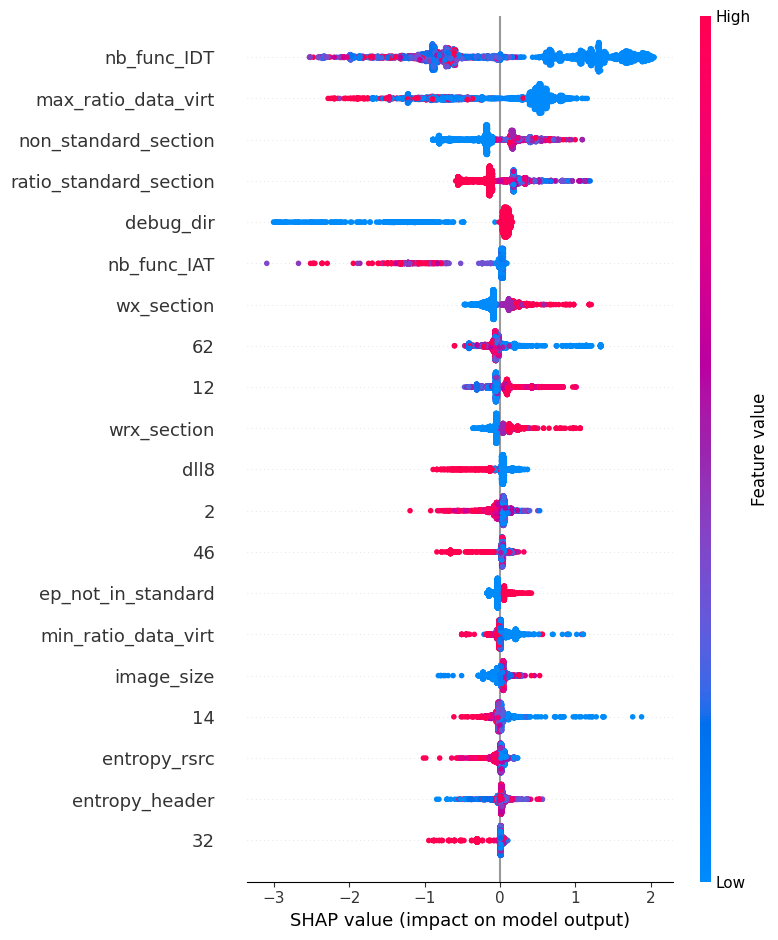

In [20]:
explainer = shap.Explainer(model6)
shap_obj = explainer(X_train)
shap_values = explainer.shap_values(X_train)

shap.summary_plot(shap_values, features = X_train,feature_names=feature_names,show=False)
plt.savefig("figures/fig6.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [21]:
with open("features/static_features_" + name + ".csv", "r") as f:
  line = f.readline()
  static_feature_names = line.split(",")
  static_feature_names.pop(0)

with open("features/features_" + name + ".csv", "r") as f:
  line = f.readline()
  feature_names = line.split(",")
  feature_names.pop(0)

feature_names = feature_names.append(static_feature_names)

data = pd.read_csv("features/features_" + name + ".csv")
data_static = pd.read_csv("features/static_features_" + name + ".csv")
data = data.merge(data_static, on='name')

labels = pd.read_csv("labels/labels_" + name + ".csv",header=None, names=['name', 'label'])
data = data.merge(labels, on='name')

names = data.loc[:,"name"]
y = data.loc[:,"label"]
X = data.drop(["name","label"], axis = 1)

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=0)
for train_index, test_index in sss.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [22]:
param_grid =  {"criterion": ["gini","entropy"],"min_samples_leaf":[2,3,4,5,6,7,8,9,10,11,12],"max_depth":[1,2,3,4,5,6,7,8,9,10,11,12]}
dt = DecisionTreeClassifier(random_state=0)
cv = StratifiedKFold(n_splits=10)
search = GridSearchCV(estimator=dt, param_grid=param_grid, cv = cv, scoring = "balanced_accuracy", n_jobs = -1)
search.fit(X_train, y_train)
print(
    "The best parameters are %s with a score of %0.5f in training and a score of %0.5f in testing"
    % (search.best_params_, search.best_score_,search.best_estimator_.score(X_test,y_test))
)
model7 = search.best_estimator_
y_pred = model7.predict(X_test)
print(
    "The F1-score is %0.5f"
    % (f1_score(y_test,y_pred))
)
print(
    "The balance accuracy is %0.5f"
    % (balanced_accuracy_score(y_test,y_pred))
)
print(
    "The precision is %0.5f"
    % (precision_score(y_test,y_pred))
)
print(
    "The recall is %0.5f"
    % (recall_score(y_test,y_pred))
)
print(classification_report(y_test,y_pred))

The best parameters are {'criterion': 'gini', 'max_depth': 12, 'min_samples_leaf': 2} with a score of 0.90843 in training and a score of 0.93412 in testing
The F1-score is 0.95813
The balance accuracy is 0.90626
The precision is 0.96196
The recall is 0.95432
              precision    recall  f1-score   support

       False       0.83      0.86      0.85       268
        True       0.96      0.95      0.96      1007

    accuracy                           0.93      1275
   macro avg       0.90      0.91      0.90      1275
weighted avg       0.93      0.93      0.93      1275



In [23]:
for i in range(len(y_pred)):
    if y_pred[i] != y_test.iloc[i]:
        print(y_test.iloc[i])
        print(names[test_index[i]])

False
a08ca509a6a895854156888cee1e97c3
True
a00c2fa51d4abf1929cb4fa0b9e787a2
True
a055ccbceafb9f0c7e67f9a149bed524
False
a099f6a976bb7413213af7464d12a1fe
False
a06e9be4c19592c4624271064097ba79
False
a0693f245f45395922242a733ee517f0
True
a05f30fe7d4fa38fefbabbc724d839a1
True
a00294f70e6d8d47666045bcab7c3985
False
a082b34ee15529ac51cec7e5a9d04b64
True
a037ad08a79c456faafb828b1c8c1a70
True
a05c1fd05cff30791ebaee79747dd8d1
True
a069e3696a33937a500827a6cd8983e8
False
a09d5500ddab1f918a8cb0909998578b
True
a06948a9bd34c7fc12bcfcf8e49ccac6
True
a01dda492c6cd7de33730a7a1d31d634
True
a06946a4c452ab233ef5fabc19ecdd74
True
a04b24f8a94b5344a4694e317e2bb103
False
a05343b02b0fb7f5267bf317bff3aaed
True
a07f658fc57c8df0bb982f3d199d1716
False
a078328474f3b8bd79e05d090d1f49c5
False
a069b4ded94373592413a9cd8cb083ea
True
a03ce12002549111b233ea4add1b47ac
False
a08dd5bd44736fa5b2ceb62d2d5df6d3
False
a0a88433713ee33228f97d80a1b18ed7
True
a04291a81358e32d59e4e7a425bcc87b
False
a0a08dfefff3adb3c90e11946f735783


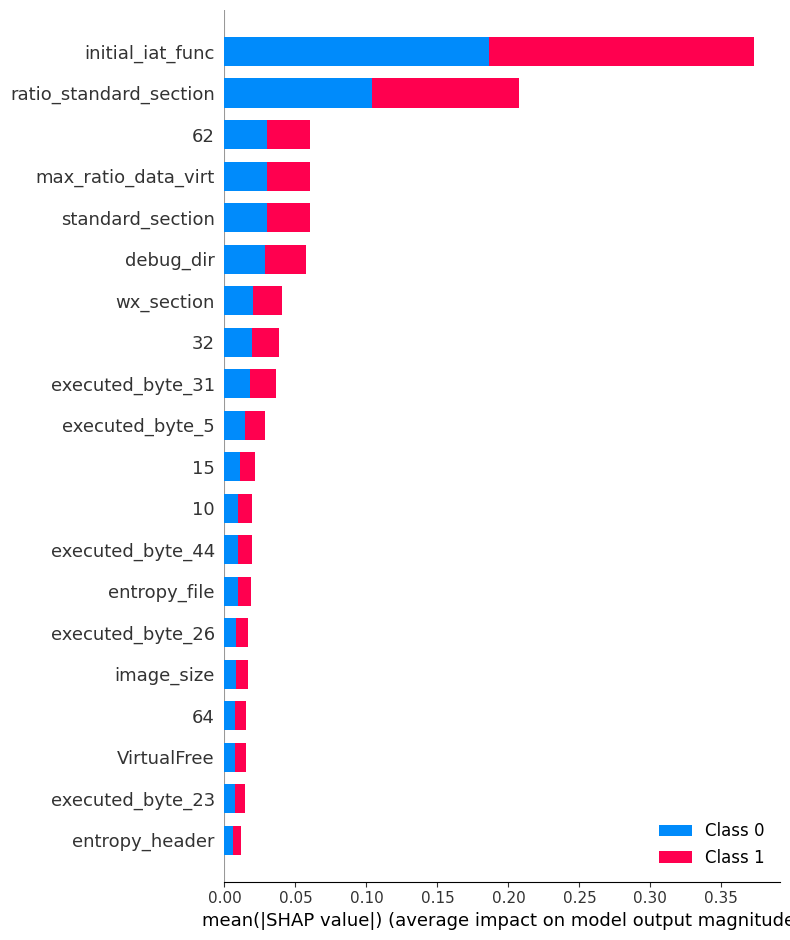

In [24]:
explainer = shap.Explainer(model7)
shap_obj = explainer(X_train)
shap_values = explainer.shap_values(X_train)

shap.summary_plot(shap_values, features = X_train,feature_names=feature_names,show=False)
plt.savefig("figures/fig7.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [25]:
param_grid =  {"criterion": ["gini","entropy"],"min_samples_leaf":[2,3,4,5,6,7,8,9,10,11,12],"max_depth":[1,2,3,4,5,6,7,8,9,10,11,12],"n_estimators" : [i for i in range(10,40)]}
rf = RandomForestClassifier(random_state = 0)
cv = StratifiedKFold(n_splits=10)
search = GridSearchCV(estimator=rf, param_grid=param_grid, cv = cv, scoring = "balanced_accuracy", n_jobs = -1)
search.fit(X_train, y_train)
print(
    "The best parameters are %s with a score of %0.5f in training and a score of %0.5f in testing"
    % (search.best_params_, search.best_score_,search.best_estimator_.score(X_test,y_test))
)
model8 = search.best_estimator_
y_pred = model8.predict(X_test)
print(
    "The F1-score is %0.5f"
    % (f1_score(y_test,y_pred))
)
print(
    "The balance accuracy is %0.5f"
    % (balanced_accuracy_score(y_test,y_pred))
)
print(
    "The precision is %0.5f"
    % (precision_score(y_test,y_pred))
)
print(
    "The recall is %0.5f"
    % (recall_score(y_test,y_pred))
)
print(classification_report(y_test,y_pred))

The best parameters are {'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 6, 'n_estimators': 34} with a score of 0.92718 in training and a score of 0.95843 in testing
The F1-score is 0.97378
The balance accuracy is 0.93261
The precision is 0.97041
The recall is 0.97716
              precision    recall  f1-score   support

       False       0.91      0.89      0.90       268
        True       0.97      0.98      0.97      1007

    accuracy                           0.96      1275
   macro avg       0.94      0.93      0.94      1275
weighted avg       0.96      0.96      0.96      1275



In [26]:
for i in range(len(y_pred)):
    if y_pred[i] != y_test.iloc[i]:
        print(y_test.iloc[i])
        print(names[test_index[i]])

False
a08ca509a6a895854156888cee1e97c3
False
a099f6a976bb7413213af7464d12a1fe
True
a05f30fe7d4fa38fefbabbc724d839a1
False
a01b493cb0679659a1aa67b1ff2878bb
False
a082b34ee15529ac51cec7e5a9d04b64
True
a037ad08a79c456faafb828b1c8c1a70
True
a05c1fd05cff30791ebaee79747dd8d1
True
a0312212cfb1ea2af8f73f1e0ce63817
False
a08dd5bd44736fa5b2ceb62d2d5df6d3
False
a0a88433713ee33228f97d80a1b18ed7
True
a027825252c9ebc465eb050a8630a77a
True
a04291a81358e32d59e4e7a425bcc87b
False
a0a08dfefff3adb3c90e11946f735783
True
a007c58625b908d8403e6199b6eaf694
True
a03cd94367ed3c268ee7c8c0a52c26fc
False
a0b9372a8bf6fdf9a8db6e0b656a364c
False
a081e362030faf5422c1d09467883207
True
a02eae1af424181bf30437157a22e983
True
a065eda751181aa131e6cca07b733d9e
False
a02d85758a5933da789c1b3a97553762
False
a0943e3483b9d8a3c38202645b601b60
False
a0d81f1a94ef81a718705fcbef7f79a8
False
a0b7e43da44290984700cd50bad99386
False
a0a55dfc84cf6eeffd94e8b9618a4031
False
a082ef2c6091d2792aa7767346910134
False
a050ce14e9162771b928b5cd0d8f5

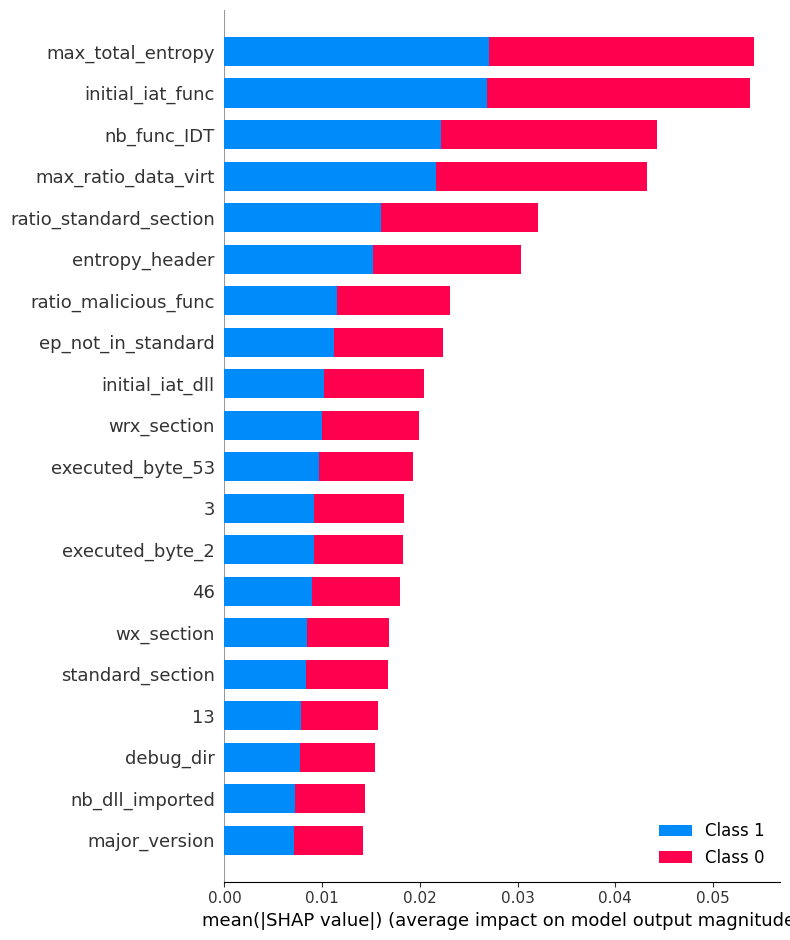

In [27]:
explainer = shap.Explainer(model8)
shap_obj = explainer(X_train)
shap_values = explainer.shap_values(X_train)

shap.summary_plot(shap_values, features = X_train,feature_names=feature_names,show=False)
plt.savefig("figures/fig8.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [28]:
param_grid = {"criterion":["friedman_mse","squared_error"],"loss": ["log_loss","exponential"],"min_samples_leaf":[2,3,4,5,6,7,8,9,10,11,12],"max_depth":[1,2,3,4,5,6,7,8,9,10,11,12],"n_estimators" : [i for i in range(10,40)]}
gbdt = GradientBoostingClassifier(random_state = 0)
cv = StratifiedKFold(n_splits=10)
search = GridSearchCV(estimator=gbdt, param_grid=param_grid, cv = cv, scoring = "balanced_accuracy", n_jobs = -1)
search.fit(X_train, y_train)
print(
    "The best parameters are %s with a score of %0.5f in training and a score of %0.5f in testing"
    % (search.best_params_, search.best_score_,search.best_estimator_.score(X_test,y_test))
)
model9 = search.best_estimator_
y_pred = model9.predict(X_test)
print(
    "The F1-score is %0.5f"
    % (f1_score(y_test,y_pred))
)
print(
    "The balance accuracy is %0.5f"
    % (balanced_accuracy_score(y_test,y_pred))
)
print(
    "The precision is %0.5f"
    % (precision_score(y_test,y_pred))
)
print(
    "The recall is %0.5f"
    % (recall_score(y_test,y_pred))
)
print(classification_report(y_test,y_pred))

The best parameters are {'criterion': 'squared_error', 'loss': 'exponential', 'max_depth': 8, 'min_samples_leaf': 6, 'n_estimators': 39} with a score of 0.92718 in training and a score of 0.95843 in testing
The F1-score is 0.97375
The balance accuracy is 0.93398
The precision is 0.97134
The recall is 0.97617
              precision    recall  f1-score   support

       False       0.91      0.89      0.90       268
        True       0.97      0.98      0.97      1007

    accuracy                           0.96      1275
   macro avg       0.94      0.93      0.94      1275
weighted avg       0.96      0.96      0.96      1275



In [29]:
for i in range(len(y_pred)):
    if y_pred[i] != y_test.iloc[i]:
        print(y_test.iloc[i])
        print(names[test_index[i]])

True
a00c7a4f7843a82943a4d0f75f2d27cf
False
a08ca509a6a895854156888cee1e97c3
True
a00c2fa51d4abf1929cb4fa0b9e787a2
False
a099f6a976bb7413213af7464d12a1fe
True
a00294f70e6d8d47666045bcab7c3985
False
a082b34ee15529ac51cec7e5a9d04b64
True
a037ad08a79c456faafb828b1c8c1a70
True
a00ed134fdbdc118f1b44989456efec7
True
a05c1fd05cff30791ebaee79747dd8d1
True
a01dda492c6cd7de33730a7a1d31d634
True
a07f658fc57c8df0bb982f3d199d1716
False
a08dd5bd44736fa5b2ceb62d2d5df6d3
False
a0a88433713ee33228f97d80a1b18ed7
False
a0a08dfefff3adb3c90e11946f735783
False
a0b9372a8bf6fdf9a8db6e0b656a364c
False
a081e362030faf5422c1d09467883207
True
a02eae1af424181bf30437157a22e983
False
a02d85758a5933da789c1b3a97553762
False
a0943e3483b9d8a3c38202645b601b60
False
a0b7e43da44290984700cd50bad99386
True
a0317e01c37d6a44c49411a0f5298efa
False
a09840025d5153dacaed811040684f97
False
a0df76978bb900579708a7f6d764b1c6
False
a0a55dfc84cf6eeffd94e8b9618a4031
False
a082ef2c6091d2792aa7767346910134
False
a0a9487eb3f188233539ee6e16fe9

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


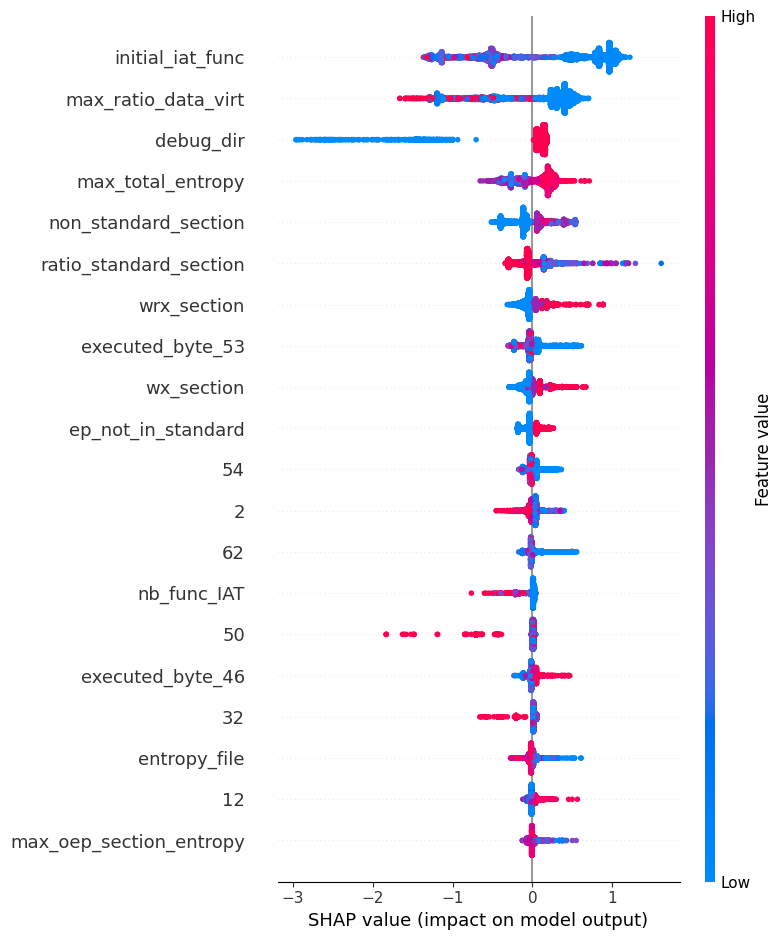

In [30]:
explainer = shap.Explainer(model9)
shap_obj = explainer(X_train)
shap_values = explainer.shap_values(X_train)

shap.summary_plot(shap_values, features = X_train,feature_names=feature_names,show=False)
plt.savefig("figures/fig9.pdf", format="pdf", bbox_inches="tight")
plt.show()